In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#from preprocess import insert_death_status

ImportError: cannot import name 'insert_death_status' from 'preprocess' (e:\education\thesis\preprocess.py)

In [109]:

def col_to_int(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].astype('int64')
        
def insert_death_status(df):
    df.loc[df.z_deatyr == -2, 'death_status'] = False
    df.loc[df.z_deatyr != -2, 'death_status'] = True 

def transform_year_to_age(df):
    df['surv_years'] = -1

    predicat = (df.z_deatyr == -2) & (df.z_age75 > 0)
    df.loc[predicat, 'surv_years'] = df.loc[predicat, 'z_age75']

    predicat = (df.z_deatyr == -2) & (df.z_ra029re > 0)
    df.loc[predicat, 'surv_years'] = df.loc[predicat, 'z_ra029re']

    predicat = (df.z_deatyr == -2) & (df.z_ga003re.isna() == False)
    df.loc[predicat, 'surv_years'] = df.loc[predicat, 'z_ga003re']

    predicat = (df.z_deatyr == -2) & (df.z_ha003re.isna() == False)
    df.loc[predicat, 'surv_years'] = df.loc[predicat, 'z_ha003re']

    predicat = (df.z_deatyr == -2) & (df.z_q1a003re.isna() == False)
    df.loc[predicat, 'surv_years'] = df.loc[predicat, 'z_q1a003re']

    predicat = df.z_deatyr != -2
    df.loc[predicat, 'surv_years'] = df[predicat].z_deatyr - df[predicat].z_brdxdy
    df.surv_years = df.surv_years.astype(int)

In [98]:
df = pd.read_sas('wls_bl_14.01.sas\wls_bl_14_01.sas7bdat')
cols_to_int = ['idpub', 'z_deatyr', 'z_sexrsp', 'familypub', 'personid', 'sibcount']
col_to_int(df, cols_to_int)

df.rtype =  df.rtype.str.decode("utf-8")
#df.selsibidpub = df.selsibidpub.astype(int)
df.loc[df.z_deatyr > 9000, 'z_deatyr'] = df[df.z_deatyr > 9000].z_deatyr - 8000
df.head()

,idpub,rtype,familypub,personid,selsibidpub,selsibtype,sibcount,srel1,srel2,srel3,...,z_q1c309re,z_q1z023rer,z_q1z024rer,z_q1u008rer,z_q1e101he,z_q1x1321re,z_q1x1319re,z_q1x1319mn,z_q1x1319yr,z_q1x1320re
0,900018,g,1201627,1,NaN,NaN,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,900021,g,1205260,1,900021.0,b's',2,0.0,6.0,NaN,...,-2.0,0.0,0.0,0.0,1.0,3.0,-4.0,-4.0,-4.0,-4.0
2,900021,s,1205260,2,900021.0,b'g',2,6.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900024,g,1208924,1,900024.0,b's',2,0.0,-4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,900024,s,1208924,2,900024.0,b'g',2,-4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#depression, neuroticism, subjective well-being
#Turley prs
turley_df = pd.read_csv('polygenic scores/Turley/Turley_idpub_shuffled.txt', sep='\t')
turley_df

,idpub,rtype,pgs_dep_gwas,pgs_neur_gwas,pgs_swb_gwas,pgs_dep_mtag,pgs_neur_mtag,pgs_swb_mtag,pc1_shuffled,pc2_shuffled,pc3_shuffled,pc4_shuffled,pc5_shuffled,pc6_shuffled,pc7_shuffled,pc8_shuffled,pc9_shuffled,pc10_shuffled
0,926517,g,-0.05704,0.05322,-0.01718,-0.02152,0.03587,-0.01042,-0.00521,-0.00583,0.00813,-0.00129,0.00183,0.00689,-0.00538,0.01293,-0.00291,-0.00208
1,918826,g,-0.06595,0.00223,-0.06263,-0.02543,0.00580,-0.03297,0.00228,0.01822,-0.01912,0.00364,-0.00074,0.00340,-0.01844,-0.01345,0.00351,0.00113
2,902333,g,0.07669,0.05424,-0.03043,0.09806,0.11744,-0.07358,-0.00227,-0.00499,0.00581,0.00188,0.00398,0.00574,0.00794,0.01230,0.00128,0.00481
3,928777,s,0.07897,0.14641,-0.10510,0.15983,0.24710,-0.16413,-0.00301,-0.01022,0.00453,0.00139,-0.00040,-0.00302,0.00347,-0.00431,-0.00131,-0.00122
4,929539,s,-0.01475,0.09114,0.01301,0.00723,0.07580,-0.00926,-0.00100,0.00337,0.00080,-0.00029,-0.00023,0.00158,0.00112,0.00808,0.00224,0.00033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8504,908472,g,0.04704,0.06480,-0.00634,0.05918,0.09366,-0.04132,0.00202,-0.00873,0.00466,0.00459,0.00055,0.00315,-0.00028,0.01009,-0.00264,-0.00473
8505,913365,s,0.01799,0.12459,-0.17444,0.13231,0.23683,-0.19725,-0.00207,-0.00850,0.01109,0.00001,0.00224,0.00112,0.00297,0.00094,-0.00056,-0.00384
8506,912706,s,-0.01972,0.08093,0.03657,-0.00547,0.05429,0.01462,-0.00215,-0.00528,0.00545,0.00222,0.00457,0.01049,-0.00623,0.00719,0.00282,-0.00596
8507,901762,g,-0.11598,-0.01558,-0.03119,-0.08648,-0.05258,0.01928,-0.00259,0.01399,-0.00287,-0.00192,-0.00024,-0.00758,-0.00587,-0.00418,0.00014,-0.00175


In [100]:
df_merged = pd.merge(df, turley_df, on=['idpub', 'rtype'], how='left', copy=False)
df_merged

,idpub,rtype,familypub,personid,selsibidpub,selsibtype,sibcount,srel1,srel2,srel3,...,pc1_shuffled,pc2_shuffled,pc3_shuffled,pc4_shuffled,pc5_shuffled,pc6_shuffled,pc7_shuffled,pc8_shuffled,pc9_shuffled,pc10_shuffled
0,900018,g,1201627,1,NaN,NaN,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,900021,g,1205260,1,900021.0,b's',2,0.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,900021,s,1205260,2,900021.0,b'g',2,6.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,900024,g,1208924,1,900024.0,b's',2,0.0,-4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,900024,s,1208924,2,900024.0,b'g',2,-4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19041,933948,s,1207646,2,933948.0,b'g',2,-4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19042,933950,g,1206561,1,933950.0,b's',2,0.0,1.0,NaN,...,0.00357,-0.00529,0.00185,0.00011,-0.00177,-0.00153,0.00201,-0.00543,-0.00071,-0.00309
19043,933950,s,1206561,2,933950.0,b'g',2,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19044,933957,g,1201794,1,933957.0,b's',2,0.0,1.0,NaN,...,-0.00094,0.00211,0.00089,0.00417,0.00504,-0.00301,-0.00279,0.00917,0.00228,0.00141


In [101]:
df_birth_merged = df_merged[df.z_brdxdy != -3]
df_birth_merged['z_brdxdy'] = df_birth_merged.z_brdxdy + 1900  
df_only_graduates = df_birth_merged[df.rtype == 'g']
df_only_siblings = df_birth_merged[df.rtype == 's']

In [67]:
def get_siblings_count_by_feature(feature_name):
    fam_pubs = df_only_graduates.familypub.array
    counts = [df_only_graduates.loc[(df_only_graduates['familypub'] == fam_pub) and
    (df_only_graduates[feature_name] == 1),
     [feature_name]].value_counts()[1] for fam_pub in fam_pubs]
    tmp_df = pd.DataFrame(data={'familypub': fam_pubs, 
    f'{feature_name}_sib_counts' : counts})
    tmp_df    

In [68]:
get_siblings_count_by_feature('z_gx356re')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
[df_only_graduates.loc[df_only_graduates['familypub'] == fam_pub, [feature_name]].value_counts()[2] for fam_pub in fam_pubs]
        

status, whether the participant has the year of death

In [110]:
insert_death_status(df_only_graduates)
insert_death_status(df_only_siblings)

In [9]:
print(f"Deceased: {df_only_graduates.loc[df_only_graduates.death_status == True].death_status.count()}")
print(f"Censored: {df_only_graduates.loc[df_only_graduates.death_status == False].death_status.count()}")
#sns.histplot(df_only_graduates.death_status)

Deceased: 3394
Censored: 6337


In [113]:
print(f"Deceased: {df_only_siblings.loc[df_only_siblings.death_status == True].death_status.count()}")
print(f"Censored: {df_only_siblings.loc[df_only_siblings.death_status == False].death_status.count()}")


Deceased: 2687
Censored: 6014


In [114]:
transform_year_to_age(df_only_graduates)
transform_year_to_age(df_only_siblings)

In [159]:
df_only_siblings.surv_years

2        -1
4        -1
6        84
8        -1
10       -1
         ..
19037    67
19039    83
19041    -1
19043    -1
19045    -1
Name: surv_years, Length: 8701, dtype: int32

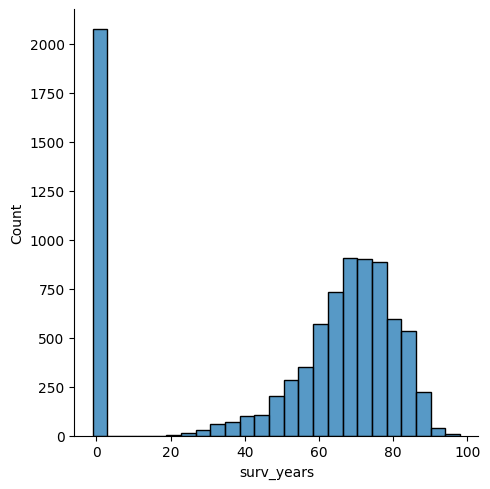

In [115]:
sns.displot(df_only_siblings.surv_years)

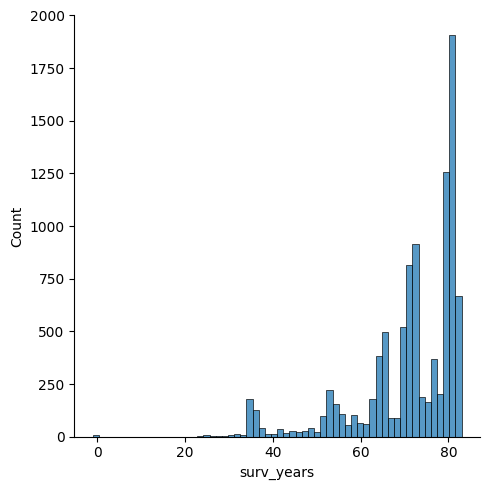

In [12]:
sns.displot(df_only_graduates.surv_years)

<AxesSubplot: xlabel='z_mx011rec', ylabel='Count'>

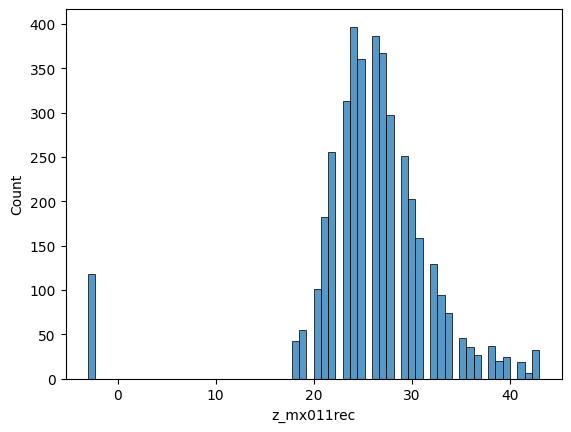

In [116]:
sns.histplot(df_only_siblings.z_mx011rec)

<AxesSubplot: xlabel='z_mx011rec', ylabel='Count'>

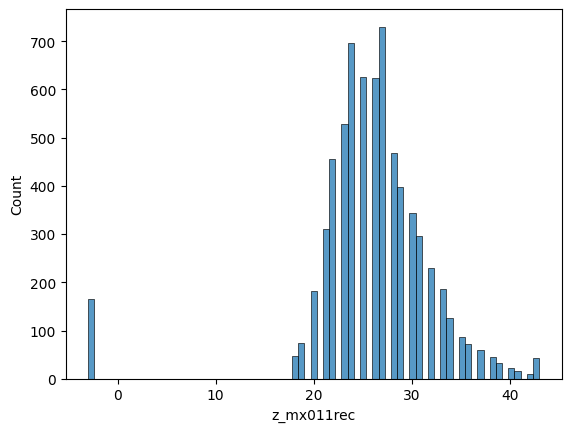

In [13]:
#BMI
sns.histplot(df_only_graduates.z_mx011rec)

# Kaplan Maier

In [14]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='timeline'>

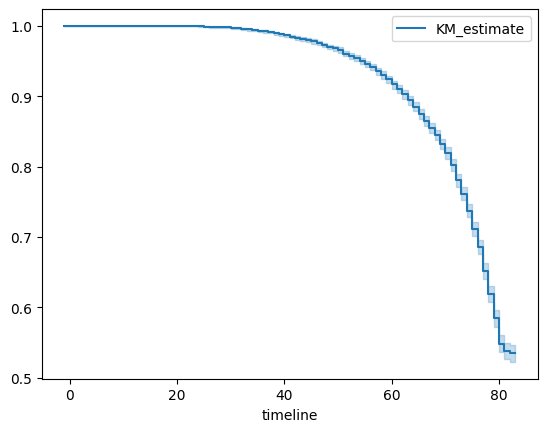

In [118]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df_only_graduates.surv_years, event_observed = df_only_graduates.death_status)
kmf.plot_survival_function()
#plt.xlabel('survival years')

<AxesSubplot: xlabel='timeline'>

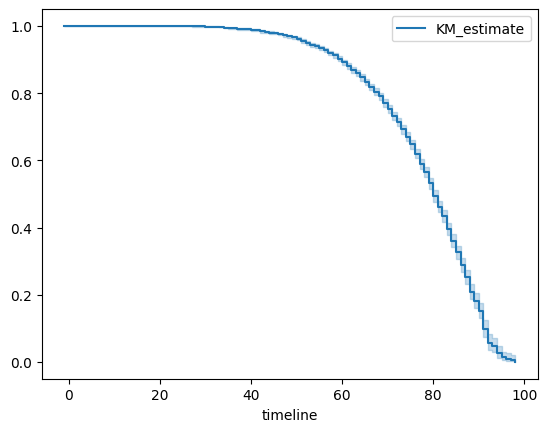

In [117]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df_only_siblings.surv_years, event_observed = df_only_siblings.death_status)
kmf.plot_survival_function()

In [16]:
df_only_graduates[df_only_graduates['z_gx357re'].isna()]

,idpub,rtype,familypub,personid,selsibidpub,selsibtype,sibcount,srel1,srel2,srel3,...,pc3_shuffled,pc4_shuffled,pc5_shuffled,pc6_shuffled,pc7_shuffled,pc8_shuffled,pc9_shuffled,pc10_shuffled,death_status,surv_years
3,900024,g,1208924.0,1,900024.0,b's',2,0.0,-4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,35
9,900035,g,1208716.0,1,900035.0,b's',2,0.0,-4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,35
19,900074,g,1209815.0,1,900074.0,b's',2,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,55
25,900083,g,1205982.0,1,900083.0,b's',2,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,60
27,900094,g,1203509.0,1,900094.0,b's',2,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,933867,g,1200333.0,1,933867.0,b's',2,0.0,1.0,NaN,...,0.00157,0.00398,0.00023,-0.00609,0.00616,-0.00203,-0.00223,-0.00161,False,81
19013,933885,g,1210034.0,1,933885.0,b's',2,0.0,1.0,NaN,...,0.00150,-0.00167,0.00883,0.00260,0.00324,-0.00323,-0.00054,-0.00135,False,81
19026,933926,g,1203387.0,1,933926.0,b's',2,0.0,-4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,65
19028,933927,g,1203309.0,1,933927.0,b's',2,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,64


In [17]:
#1 - MALE
#2 - FEMALE
df_only_graduates.z_sexrsp = df_only_graduates.z_sexrsp.astype(int)
#df_only_graduates.z_gx356re = df_only_graduates.z_gx356re.astype(int)

In [18]:
def plot_two_kmf(predicat1, predicat2, dataset, title, l1, l2):
    ax = plt.subplot(111)
    kmf = KaplanMeierFitter()
    kmf.fit(durations = dataset[predicat1].surv_years, event_observed = dataset[predicat1].death_status, label = l1)
    kmf.plot_survival_function(ax = ax)
    kmf.fit(dataset[predicat2].surv_years, event_observed = dataset[predicat2].death_status, label = l2)
    kmf.plot_survival_function(ax = ax, at_risk_counts = True)
    plt.title(title)

## Gender comparisment

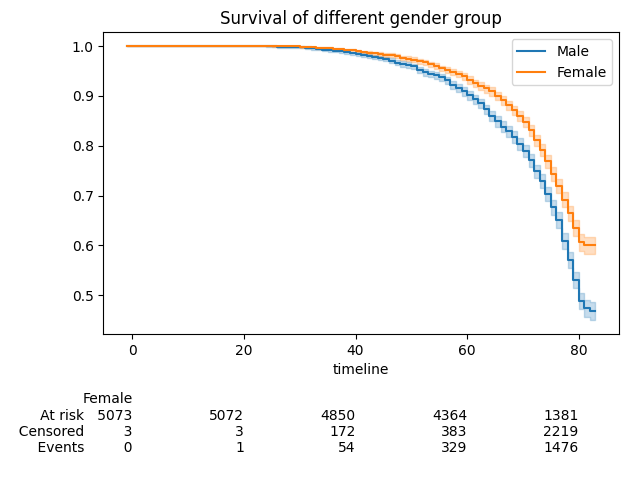

In [19]:
m = df_only_graduates.z_sexrsp == 1

plot_two_kmf(m, ~m, df_only_graduates, "Survival of different gender group", 'Male', 'Female')

## Has a doctor ever told you that you had a stroke?


In [20]:
def plot_km_cat(col_name, df_tmp_re):
    T = df_tmp_re.surv_years
    E = df_tmp_re.death_status

    m_types = df_tmp_re.sort_values(by = [col_name])[col_name].unique()
    for i, m_types in enumerate(m_types):
        ax = plt.subplot(2, 2, i + 1)
        ix = df_tmp_re[col_name] == m_types
        kmf.fit(T[ix], E[ix], label = m_types)
        kmf.plot_survival_function(ax = ax, legend = False)
        if m_types == -3:
            plt.title('REFUSED')
        elif m_types == 1:
            plt.title('YES')
        elif m_types == 2:
            plt.title('NO')
        elif m_types == -2:
            plt.title('Inappropriate')
        elif m_types == -1:
            plt.title('Don\'t know')
        else:
            plt.title(m_types)
        #plt.xlim(0, 100)
    plt.tight_layout()

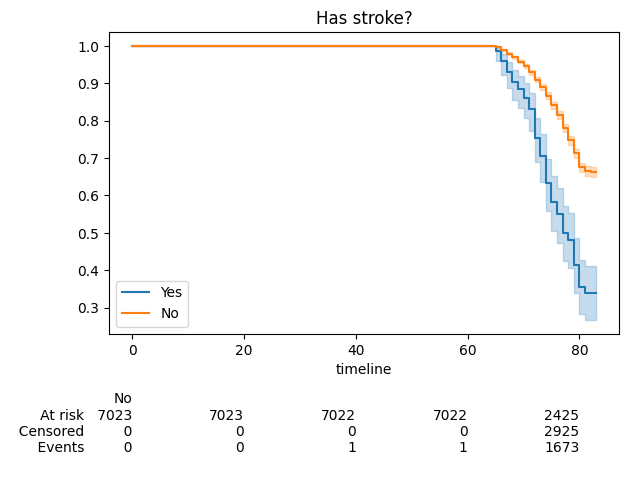

In [21]:
#-3 Refused (only 3 people)
# -1 Don't know (only 8 people)
# 1 yes
# 2 no

#df_tmp_re = df_only_graduates.loc[df_only_graduates['z_gx356re'].isna() == False]
#plot_km_cat('z_gx356re', df_tmp_re)

p1 = df_only_graduates.z_gx356re == 1
p2 = df_only_graduates.z_gx356re == 2

plot_two_kmf(p1, p2, df_only_graduates, "Has stroke?", 'Yes', 'No')

## Did you have a heart attack or myocardial infarction

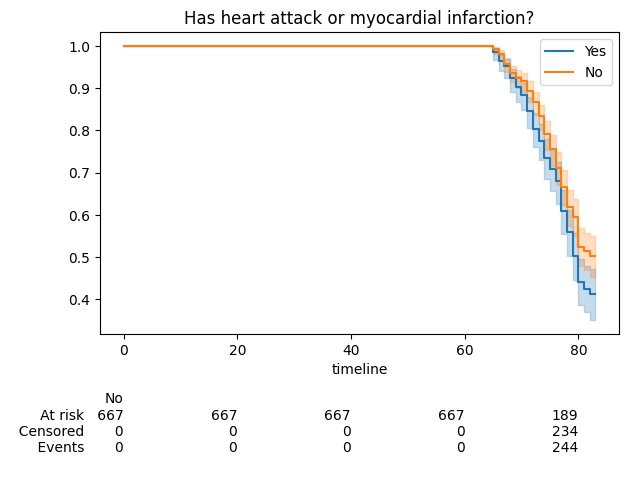

In [22]:


df_tmp_re = df_only_graduates.loc[df_only_graduates['z_gx352re'].isna() == False]
df_tmp_re = df_tmp_re.loc[df_tmp_re['z_gx352re'] != -3]

#plot_km_cat('z_gx352re', df_tmp_re)

p1 = df_only_graduates.z_gx352re == 1
p2 = df_only_graduates.z_gx352re == 2

plot_two_kmf(p1, p2, df_only_graduates, "Has heart attack or myocardial infarction?", 'Yes', 'No')

## R5 Has a doctor ever told you that you have diabetes?


In [23]:
#time sequence analysis
#coxphfitter forest plot

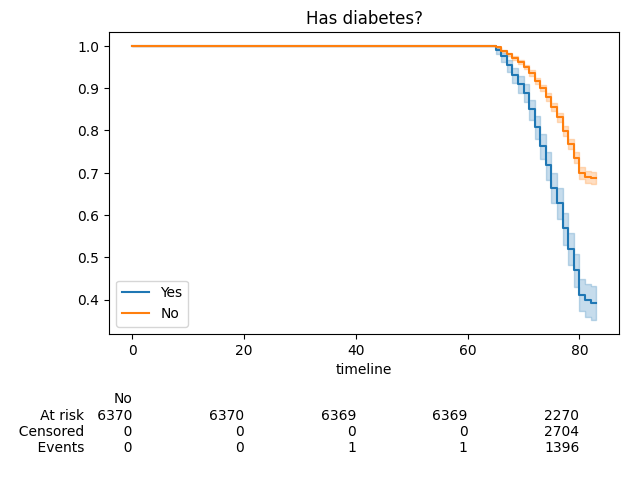

In [24]:
df_tmp_re = df_only_graduates.loc[df_only_graduates['z_gx342re'].isna() == False]

#plot_km_cat('z_gx342re', df_tmp_re)

p1 = df_only_graduates.z_gx342re == 1
p2 = df_only_graduates.z_gx342re == 2
plot_two_kmf(p1, p2, df_only_graduates, "Has diabetes?", 'Yes', 'No')

## Has a doctor ever told you that you have cancer or a malignant tumor, not including minor skin cancers?

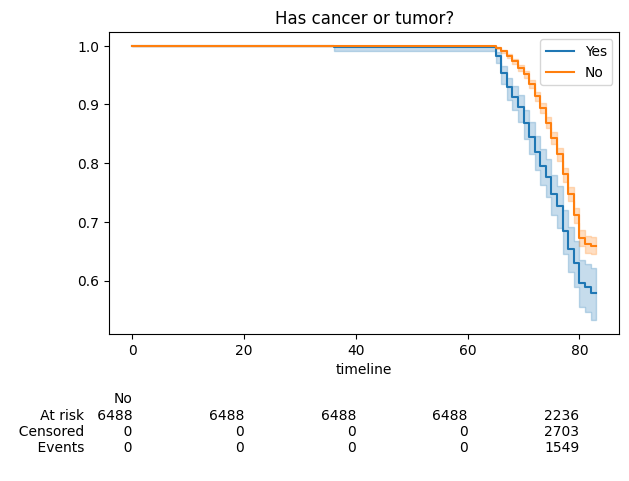

In [25]:
categ_col = 'z_gx348re'
df_tmp_re = df_only_graduates.loc[df_only_graduates[categ_col].isna() == False]

#plot_km_cat(categ_col, df_tmp_re)

p1 = df_only_graduates.z_gx348re == 1
p2 = df_only_graduates.z_gx348re == 2
plot_two_kmf(p1, p2, df_only_graduates, "Has cancer or tumor?", 'Yes', 'No')

# Cox proportinal hazard model

In [26]:
pd.read_csv('wls_bl_14.01.sas/WLS_Long_Form_Variable_List.csv')

,Stacked Status,Variable Pair,Long Form Variable Name,Variable Label,Link Grad,Link Sib
0,paired,brdxdy/xbrdxdy,z_brdxdy,RS Year of participants's birth,module=dscrMod,module=dscrMod
1,paired,sexrsp/ssbsex,z_sexrsp,RS Sex of participant,module=dscrMod,module=dscrMod
2,paired,group91,z_group91,RS Group to which graduate was randomly assign...,module=dscrMod,module=dscrMod
3,paired,livgrad/xlivsib,z_livgrad,RS Is the participant alive as of current rele...,module=dscrMod,module=dscrMod
4,paired,deatyr/xdeatyr,z_deatyr,RS Year of participant's death.,module=dscrMod,module=dscrMod
...,...,...,...,...,...,...
15685,paired,q1x1321re/o1x1321re,z_q1x1321re,R7 How much did you support stay-at-home orders?,module=q1covid,module=o1covid
15686,paired,q1x1319re/o1x1319re,z_q1x1319re,R7 Have you received at least 1 shot of covid1...,module=q1covid,module=o1covid
15687,paired,q1x1319mn/o1x1319mn,z_q1x1319mn,R7 Month received 1st shot.,module=q1covid,module=o1covid
15688,paired,q1x1319yr/o1x1319yr,z_q1x1319yr,R7 Year received 1st shot.,module=q1covid,module=o1covid


In [27]:
pd.read_excel('wls_bl_14.01.sas/WLS_Long_Form_Variable_List.xlsx', index_col=0)

,Unnamed: 1
NaN,This document is meant to be used with the WLS...
NaN,NaN
NaN,NaN
NaN,Makes use of Excel's filter capabilities to li...
NaN,NaN
NaN,NaN
NaN,"NOTE: If the ""Variable Pair"" column only has o..."
NaN,NaN
NaN,NaN
NaN,Resource/Tab Descriptions


z_gx342re	R5 Has a doctor ever told you that you have diabetes? <br>
z_gx343re	R5 In what year were you first diagnosed with diabetes? <br>

z_gx346re	R5 Has a doctor ever told you that you have high blood sugar? <br>
z_gx347re	R5 In what year were you first diagnosed with high blood sugar? <br>


z_gx348re	R5 Has a doctor ever told you that you have cancer or a malignant tumor, not including minor skin cancers? <br>
z_gx349re	R5 In what year was your cancer or malignant tumor, not including minor skin cancers, diagnosed? <br>


In [89]:
#'z_gx343re', 'z_gx347re' 'z_gx349re' 'z_gx357re'
col_to_choose = ['z_gx342re', 'z_gx346re',  
'z_gx348re', 'z_gx356re', ] 

df_only_gradutes_cox = df_only_graduates[col_to_choose + [ 'surv_years', 'death_status']].dropna()
df_only_gradutes_cox[col_to_choose] = df_only_gradutes_cox[col_to_choose] - 1

for c in col_to_choose:
    df_only_gradutes_cox = df_only_gradutes_cox[df_only_gradutes_cox[c].notna()]
    df_only_gradutes_cox[c] = df_only_gradutes_cox[c].astype(int)

In [90]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_only_gradutes_cox, duration_col = 'surv_years', event_col = 'death_status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7264 total observations, 5431 right-censored observations>
             duration col = 'surv_years'
                event col = 'death_status'
      baseline estimation = breslow
   number of observations = 7264
number of events observed = 1833
   partial log-likelihood = -15232.78
         time fit was run = 2022-12-27 15:54:06 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
z_gx342re   0.79       2.21       0.21             0.38             1.20                 1.47                 3.33
z_gx346re  -0.42       0.66       0.05            -0.52            -0.31                 0.59                 0.73
z_gx348re  -0.27       0.77       0.06            -0.39            -0.14                 0.68                 0.87
z_gx356re  -0.72       0.49       0.08            -0.87            -0.57                 0.42                 0.57

            cmp to     z      p   -log2(p)
covariate                                 
z_gx342re     0.00  3.80 <0.005      12.75
z_gx346re     0.00 -7.77 <0.005      46.81
z_gx348re     0.00 -4.17 <0.005      14.97
z_gx356re     0.00 -9.44 <0.005      67.84
---
Concordance = 0.60
Partial AIC = 30473.57
log-likelihood ratio test = 311.22 on 4 df
-log2(p) of ll-ratio test = 217.21

covariate
z_gx342re    0.792779
z_gx346re   -0.417043
z_gx348re   -0.265030
z_gx356re   -0.718641
Name: coef, dtype: float64

In [149]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
z_gx342re,0.792779,2.209527,0.208712,0.383711,1.201846,1.467721,3.326252,0.0,3.798438,1.456106e-04,12.745597
z_gx346re,-0.417043,0.658993,0.053700,-0.522293,-0.311792,0.593159,0.732134,0.0,-7.766137,8.091597e-15,46.812497
z_gx348re,-0.265030,0.767183,0.063625,-0.389732,-0.140328,0.677238,0.869073,0.0,-4.165516,3.106488e-05,14.974356
z_gx356re,-0.718641,0.487414,0.076141,-0.867876,-0.569407,0.419843,0.565861,0.0,-9.438240,3.790917e-21,67.837943


covariate
z_gx342re    0.383711
z_gx346re   -0.522293
z_gx348re   -0.389732
z_gx356re   -0.867876
Name: coef lower 95%, dtype: float64

In [154]:
len(x)

4

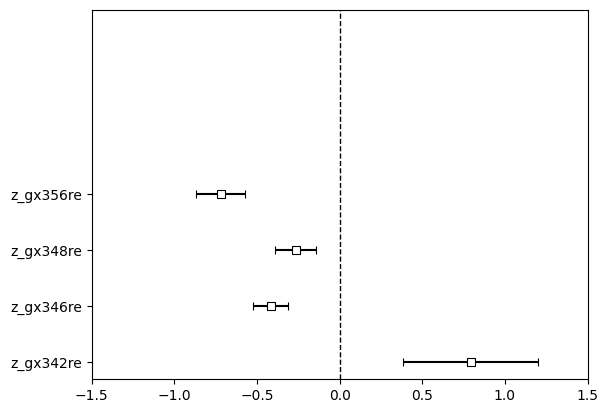

In [155]:
fig, ax = plt.subplots()

x = cph.summary['coef']
y = np.arange(0, 4)
xerr = abs(cph.summary['coef upper 95%']-cph.summary['coef lower 95%'])/2
yticks_label=list(cph.summary.index)

ax.errorbar(x, y, xerr=xerr, fmt ='s', mfc='white', color='black', capsize=3, markeredgewidth=0.8)
plt.xlim(-1.5,1.5)
plt.yticks(range(0,4),yticks_label)
plt.vlines(0, 0, 6, linestyles = "dashed", transform=ax.get_xaxis_transform(), color='black', linewidth=1)
plt.show()


In [120]:
df_only_gradutes_cox.surv_years

1        82
5        81
7        72
11       81
13       81
         ..
19034    81
19036    70
19038    82
19042    75
19044    81
Name: surv_years, Length: 7264, dtype: int32

In [122]:
cph.predict_cumulative_hazard(df_only_gradutes_cox)

,1,5,7,11,13,15,17,21,22,24,...,19020,19022,19024,19030,19032,19034,19036,19038,19042,19044
36.0,0.000139,0.000107,0.000256,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000219,0.000107,0.000107,0.000107,0.000373,0.000107,0.000256,0.000256,0.000107,0.000107
63.0,0.000139,0.000107,0.000256,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000219,0.000107,0.000107,0.000107,0.000373,0.000107,0.000256,0.000256,0.000107,0.000107
64.0,0.000139,0.000107,0.000256,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000219,0.000107,0.000107,0.000107,0.000373,0.000107,0.000256,0.000256,0.000107,0.000107
65.0,0.004654,0.003570,0.008568,0.003570,0.003570,0.003570,0.003570,0.003570,0.003570,0.003570,...,0.007325,0.003570,0.003570,0.003570,0.012475,0.003570,0.008568,0.008568,0.003570,0.003570
66.0,0.013379,0.010264,0.024632,0.010264,0.010264,0.010264,0.010264,0.010264,0.010264,0.010264,...,0.021059,0.010264,0.010264,0.010264,0.035866,0.010264,0.024632,0.024632,0.010264,0.010264
67.0,0.023207,0.017804,0.042727,0.017804,0.017804,0.017804,0.017804,0.017804,0.017804,0.017804,...,0.036528,0.017804,0.017804,0.017804,0.062213,0.017804,0.042727,0.042727,0.017804,0.017804
68.0,0.033974,0.026064,0.062550,0.026064,0.026064,0.026064,0.026064,0.026064,0.026064,0.026064,...,0.053475,0.026064,0.026064,0.026064,0.091077,0.026064,0.062550,0.062550,0.026064,0.026064
69.0,0.046333,0.035546,0.085303,0.035546,0.035546,0.035546,0.035546,0.035546,0.035546,0.035546,...,0.072927,0.035546,0.035546,0.035546,0.124207,0.035546,0.085303,0.085303,0.035546,0.035546
70.0,0.060004,0.046034,0.110473,0.046034,0.046034,0.046034,0.046034,0.046034,0.046034,0.046034,...,0.094446,0.046034,0.046034,0.046034,0.160856,0.046034,0.110473,0.110473,0.046034,0.046034
71.0,0.078446,0.060182,0.144427,0.060182,0.060182,0.060182,0.060182,0.060182,0.060182,0.060182,...,0.123473,0.060182,0.060182,0.060182,0.210294,0.060182,0.144427,0.144427,0.060182,0.060182


In [136]:
len(df_only_gradutes_cox)

7264

In [135]:
df_only_gradutes_cox.iloc[]

TypeError: object of type '_iLocIndexer' has no len()

In [126]:
df_only_gradutes_cox.iloc[0]

z_gx342re           1
z_gx346re           1
z_gx348re           0
z_gx356re           1
surv_years         82
death_status    False
Name: 1, dtype: object

In [156]:
cph.predict_expectation(df_only_gradutes_cox, 
conditional_after=df_only_gradutes_cox.surv_years)

1        47.000000
5        46.816932
7        24.847746
11       46.816932
13       46.816932
           ...    
19034    46.816932
19036    22.968657
19038    47.000000
19042    38.479985
19044    46.816932
Length: 7264, dtype: float64

In [142]:
df_only_gradutes_cox.surv_years.mean()

75.77822136563877

In [158]:
df_only_siblings.iloc[6].

idpub              900043
rtype                   s
familypub         1209454
personid                1
selsibidpub      900043.0
                   ...   
pc8_shuffled      0.00866
pc9_shuffled     -0.00749
pc10_shuffled    -0.00387
death_status        False
surv_years             79
Name: 14, Length: 13767, dtype: object

In [157]:
cph.predict_expectation(df_only_siblings, conditional_after=df_only_siblings.surv_years)

2              NaN
4              NaN
6        47.000000
8              NaN
10             NaN
           ...    
19037    39.343311
19039          NaN
19041          NaN
19043          NaN
19045          NaN
Length: 8701, dtype: float64

<AxesSubplot: xlabel='HR (95% CI)'>

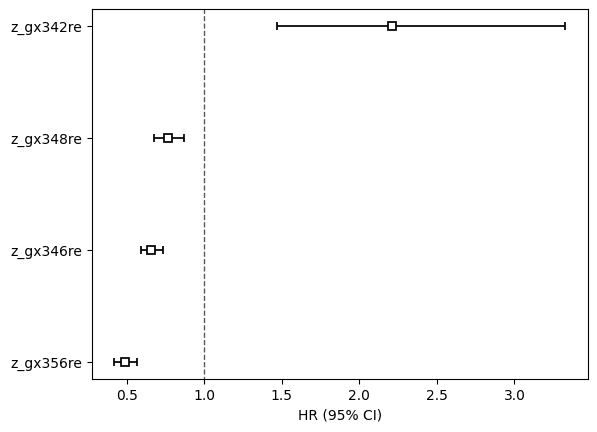

In [92]:
#plt.subplots(figsize = (10, 6))
cph.plot(hazard_ratios=True)

<AxesSubplot: >

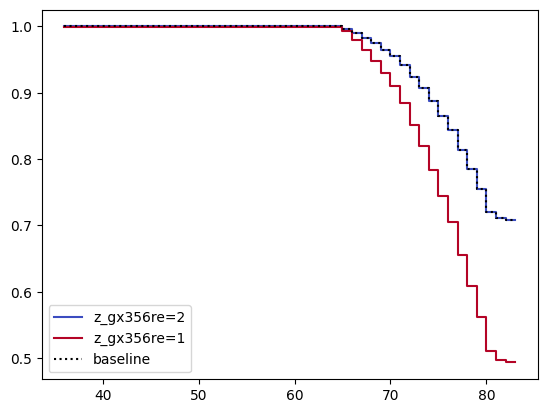

In [84]:
cph.plot_partial_effects_on_outcome(covariates = 'z_gx356re', values = [2, 1], cmap = 'coolwarm')

In [93]:
cph.check_assumptions(df_only_gradutes_cox, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7264 total observations, 5431 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
z_gx342re km              5.71   0.02      5.89
          rank            6.08   0.01      6.19
z_gx346re km              5.31   0.02      5.56
          rank            5.53   0.02      5.74
z_gx348re km             25.58 <0.005     21.17
          rank           27.57 <0.005     22.65
z_gx356re km              0.53   0.47      1.10
          rank            0.46   0.50      1.00



1. Variable 'z_gx342re' failed the non-proportional test: p-value is 0.0137.

   Advice 1: the functional form of the variable 'z_gx342re' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'z_gx342re' using pd.cut, and then specify it in
`strata=['z_gx342re', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'z_gx346re' failed the non-proportional test: p-value is 0.0186.

   Advice 1: the functional form of the variable 'z_gx346re' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a func

[]